In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("D:\Data file.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data.shape

(209593, 36)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

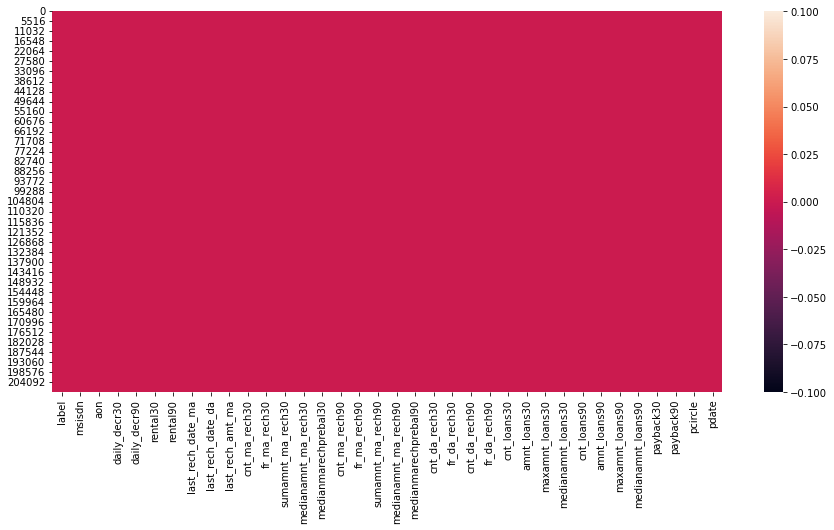

In [8]:
plt.figure(figsize=[15,7])
sns.heatmap(data.isnull())
plt.show()

### observation-1

In the above dataset :

1) The size of table is 209593* 36 i.e. no. of rows are 209593 and no. of columns are 36(including target).

2) Out of 36 columns 3 columns are object type in nature and rest 33 are numeric type.

3) Null values are not present in the data set as we can see in ths seaborn heatmap so there is no need to adopt imputation technique.

4) In case of object data type, we will apply the encoding technique to convert the values in the numeric format

### EDA-Exploratory data analysis

1    183431
0     26162
Name: label, dtype: int64


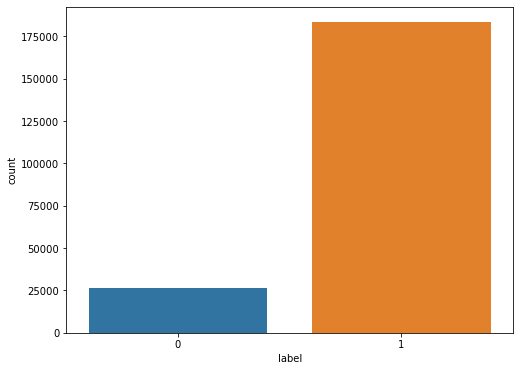

In [9]:
print(data['label'].value_counts())
plt.figure(figsize=[8,6])
sns.countplot(data['label'])
plt.show()

UPW    209593
Name: pcircle, dtype: int64


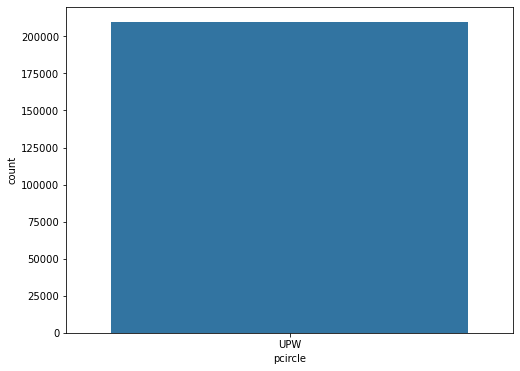

In [10]:
print(data['pcircle'].value_counts())
plt.figure(figsize=[8,6])
sns.countplot(data['pcircle'])
plt.show()

as we can see that we have 3 columns which are not so important for prediction the target column. therefore we can drop these columns.

msisdn-mobile number of user

pcircle-telecom circle

pdate- date

In [11]:
data.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [12]:
data.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

### Observation-2

In the target column only two types of values is present 0 and 1.

Label ‘1’ indicates that the loan has been payed.i.e. non-defaulter.

while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

here we can say that our target column is imbalanced because the count of defaulter is 26162 and count of non-defaulter is 183431.

* In our data set some column was present 'msisdn','pcircle','pdate', which was not so important for prediction, that is why we dropped that columns.

### Checking Outliers

In [13]:
data.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

label                   AxesSubplot(0.125,0.826831;0.168478x0.053169)
aon                  AxesSubplot(0.327174,0.826831;0.168478x0.053169)
daily_decr30         AxesSubplot(0.529348,0.826831;0.168478x0.053169)
daily_decr90         AxesSubplot(0.731522,0.826831;0.168478x0.053169)
rental30                AxesSubplot(0.125,0.763028;0.168478x0.053169)
rental90             AxesSubplot(0.327174,0.763028;0.168478x0.053169)
last_rech_date_ma    AxesSubplot(0.529348,0.763028;0.168478x0.053169)
last_rech_date_da    AxesSubplot(0.731522,0.763028;0.168478x0.053169)
last_rech_amt_ma        AxesSubplot(0.125,0.699225;0.168478x0.053169)
cnt_ma_rech30        AxesSubplot(0.327174,0.699225;0.168478x0.053169)
fr_ma_rech30         AxesSubplot(0.529348,0.699225;0.168478x0.053169)
sumamnt_ma_rech30    AxesSubplot(0.731522,0.699225;0.168478x0.053169)
dtype: object

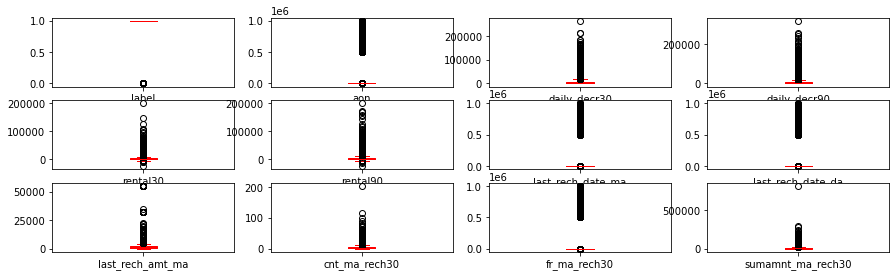

In [14]:
data.iloc[:,0:12].plot(kind='box',subplots=True,figsize=[15,18],layout=(12,4),color='r')

medianamnt_ma_rech30       AxesSubplot(0.125,0.826831;0.168478x0.053169)
medianmarechprebal30    AxesSubplot(0.327174,0.826831;0.168478x0.053169)
cnt_ma_rech90           AxesSubplot(0.529348,0.826831;0.168478x0.053169)
fr_ma_rech90            AxesSubplot(0.731522,0.826831;0.168478x0.053169)
sumamnt_ma_rech90          AxesSubplot(0.125,0.763028;0.168478x0.053169)
medianamnt_ma_rech90    AxesSubplot(0.327174,0.763028;0.168478x0.053169)
medianmarechprebal90    AxesSubplot(0.529348,0.763028;0.168478x0.053169)
cnt_da_rech30           AxesSubplot(0.731522,0.763028;0.168478x0.053169)
fr_da_rech30               AxesSubplot(0.125,0.699225;0.168478x0.053169)
cnt_da_rech90           AxesSubplot(0.327174,0.699225;0.168478x0.053169)
fr_da_rech90            AxesSubplot(0.529348,0.699225;0.168478x0.053169)
cnt_loans30             AxesSubplot(0.731522,0.699225;0.168478x0.053169)
dtype: object

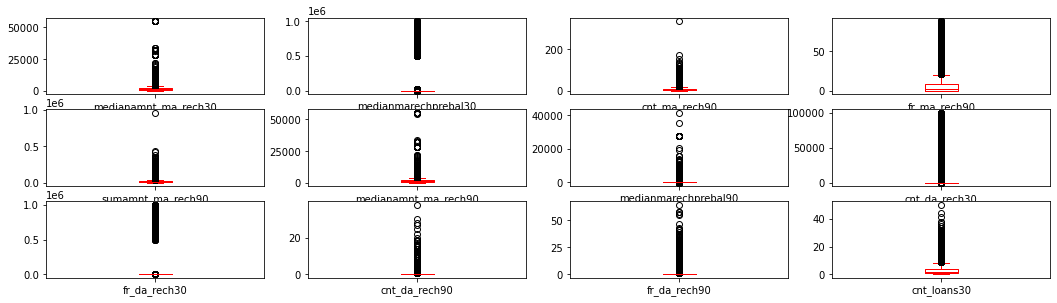

In [15]:
data.iloc[:,12:24].plot(kind='box',subplots=True,figsize=[18,20],layout=(12,4),color='r')

amnt_loans30             AxesSubplot(0.125,0.826831;0.133621x0.053169)
maxamnt_loans30       AxesSubplot(0.285345,0.826831;0.133621x0.053169)
medianamnt_loans30     AxesSubplot(0.44569,0.826831;0.133621x0.053169)
cnt_loans90           AxesSubplot(0.606034,0.826831;0.133621x0.053169)
amnt_loans90          AxesSubplot(0.766379,0.826831;0.133621x0.053169)
maxamnt_loans90          AxesSubplot(0.125,0.763028;0.133621x0.053169)
medianamnt_loans90    AxesSubplot(0.285345,0.763028;0.133621x0.053169)
payback30              AxesSubplot(0.44569,0.763028;0.133621x0.053169)
payback90             AxesSubplot(0.606034,0.763028;0.133621x0.053169)
dtype: object

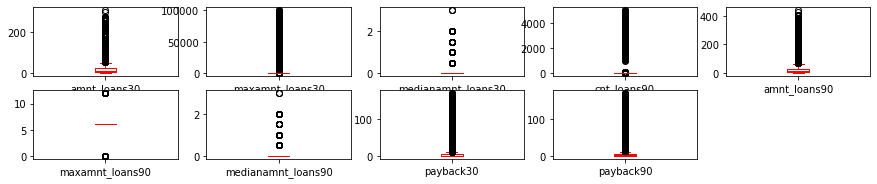

In [16]:
data.iloc[:,24:].plot(kind='box',subplots=True,figsize=[15,18],layout=(12,5),color='r')

## Checking skewness

In [17]:
from scipy.stats import skew

In [18]:
data.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

label
-2.2702374722925835


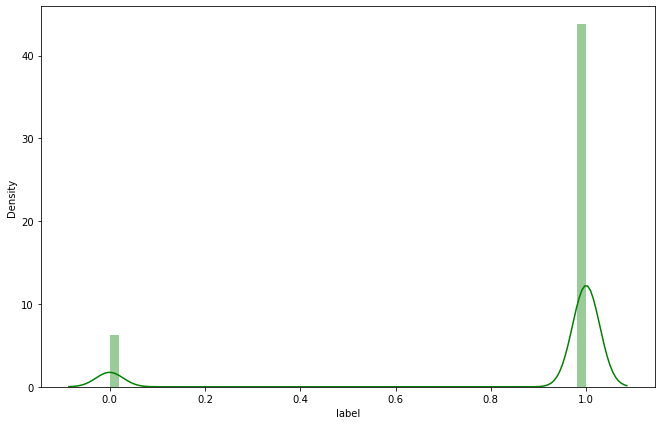

aon
10.392874441936286


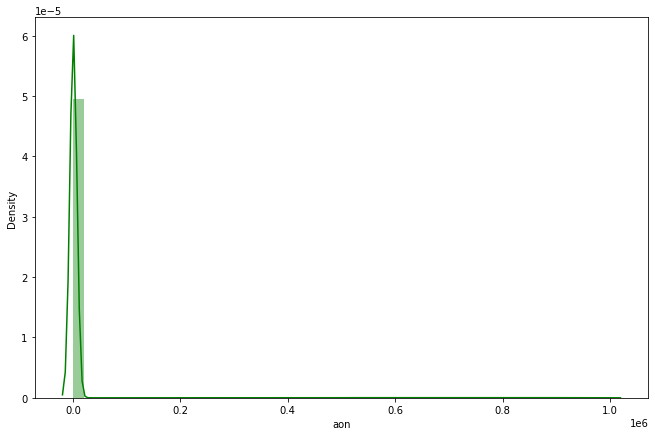

daily_decr30
3.9462019874779264


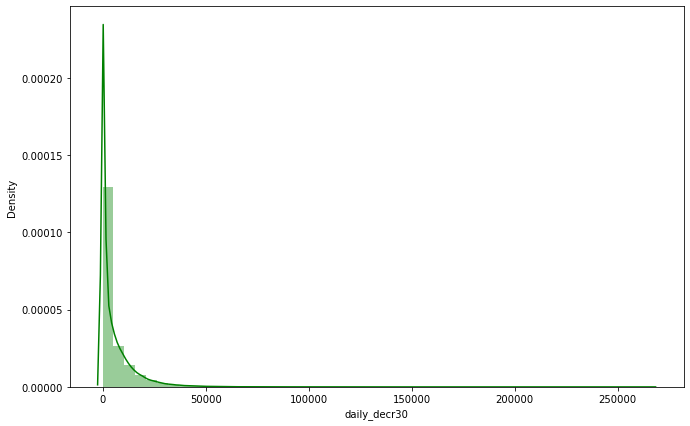

daily_decr90
4.252534591106086


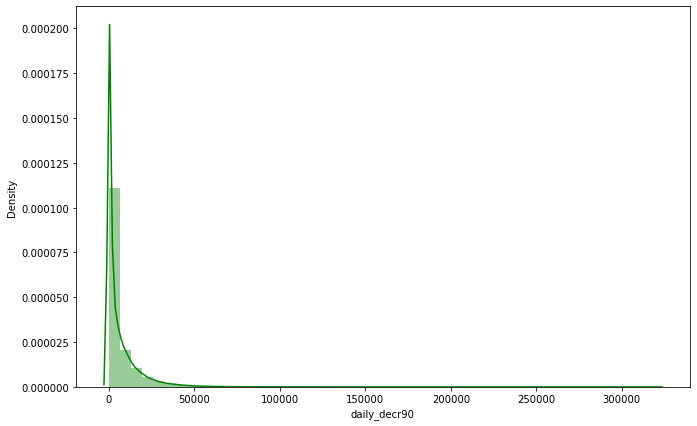

rental30
4.5218966473064315


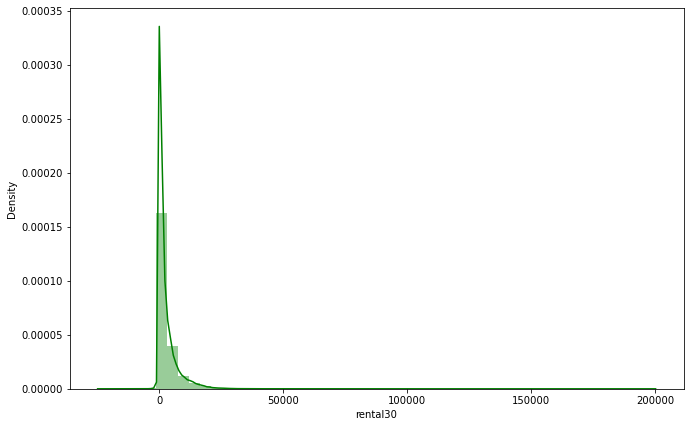

rental90
4.4376487807407266


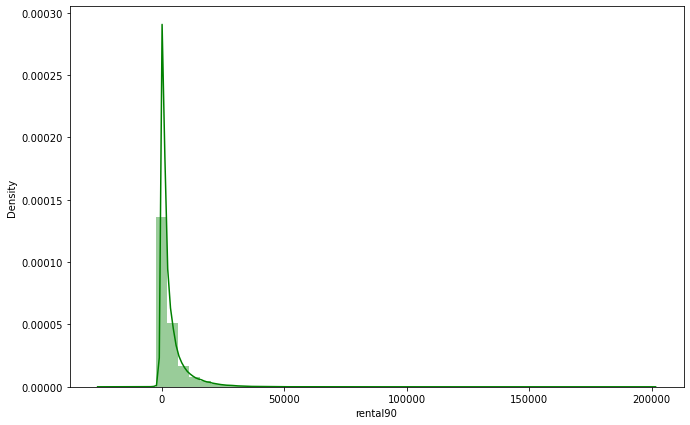

last_rech_date_ma
14.790868005814286


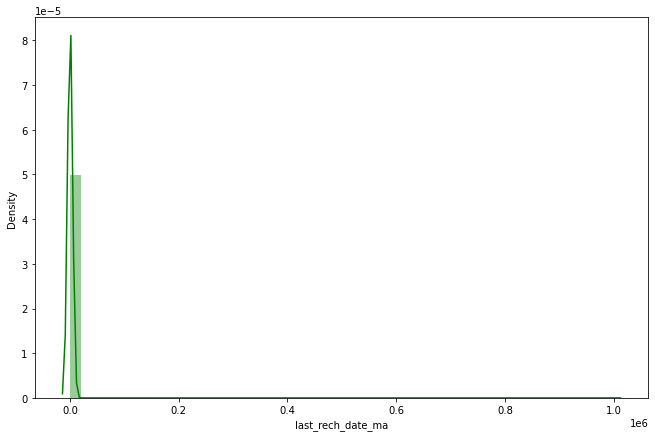

last_rech_date_da
14.814751205382457


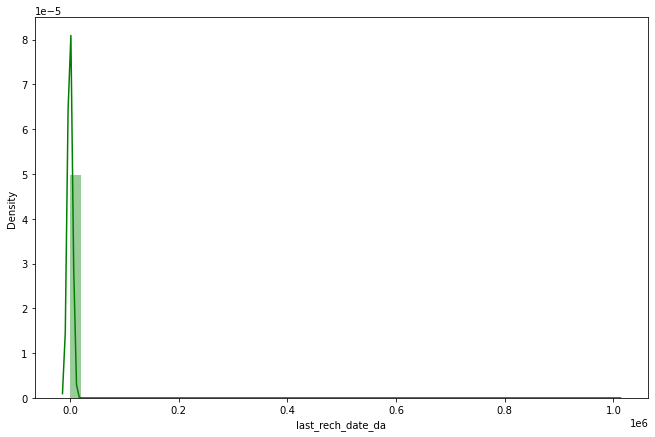

last_rech_amt_ma
3.781121576407043


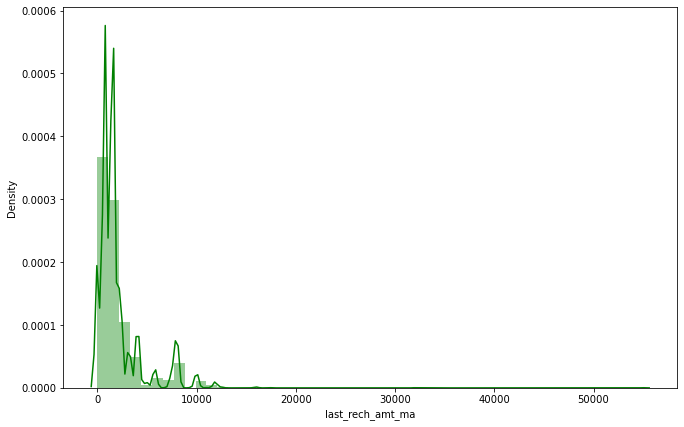

cnt_ma_rech30
3.2838180013879295


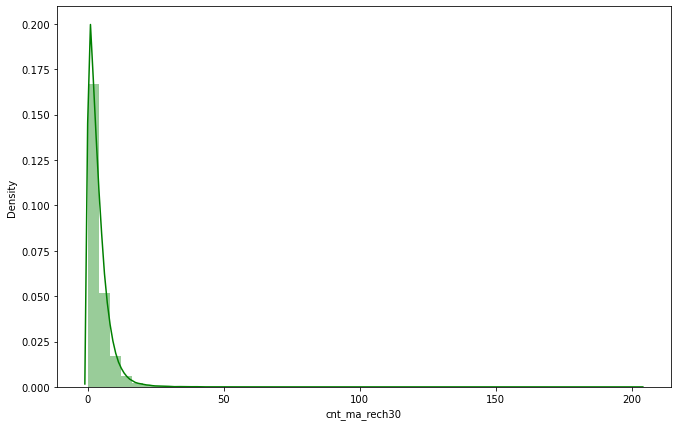

fr_ma_rech30
14.772726911394182


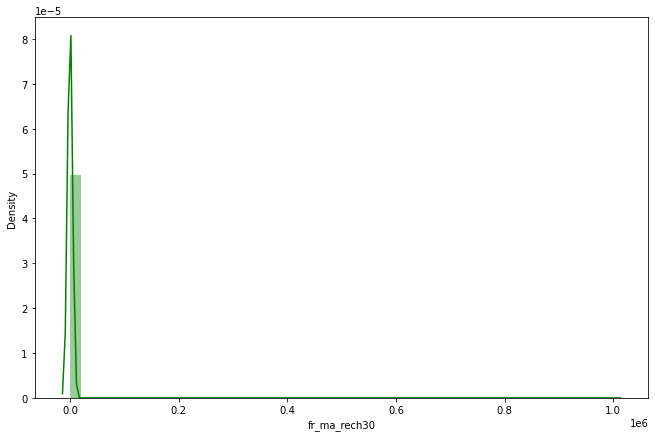

sumamnt_ma_rech30
6.386741340983388


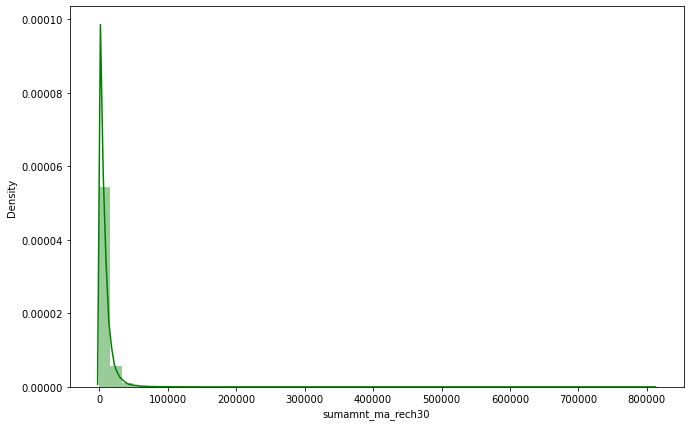

medianamnt_ma_rech30
3.512299013694375


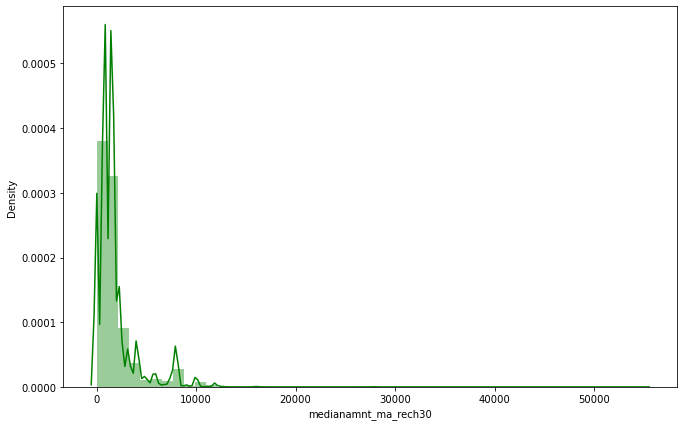

medianmarechprebal30
14.779769568118233


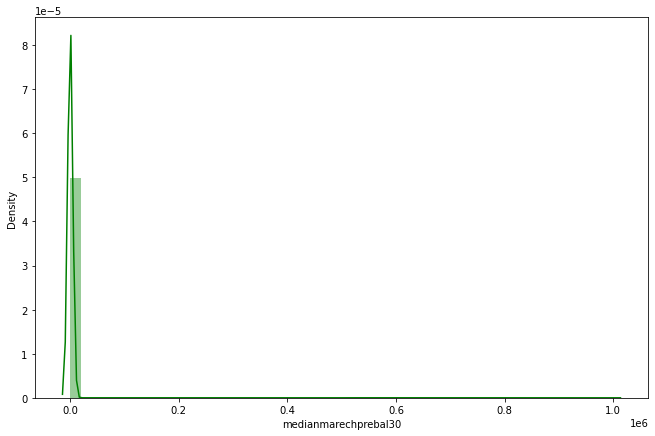

cnt_ma_rech90
3.425229132902297


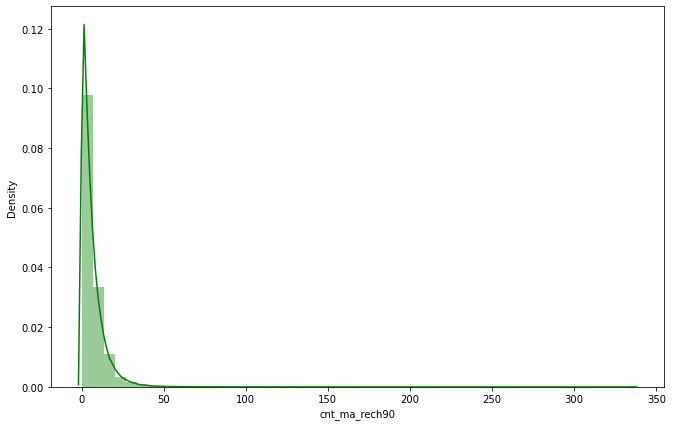

fr_ma_rech90
2.2854064403417964


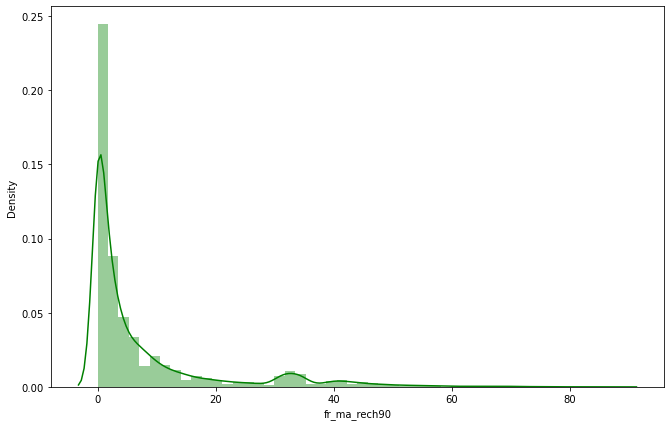

sumamnt_ma_rech90
4.897914558768428


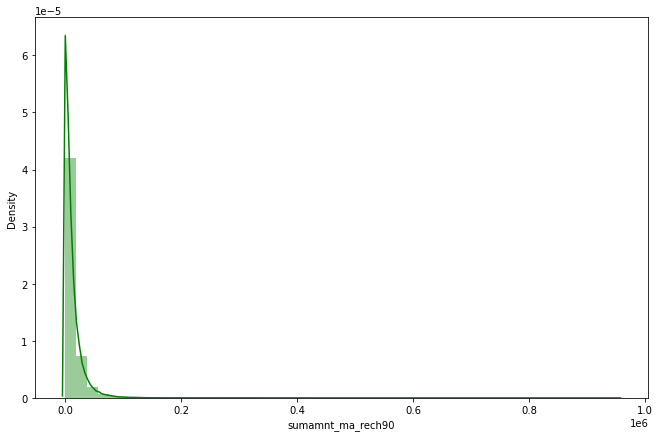

medianamnt_ma_rech90
3.752679166445998


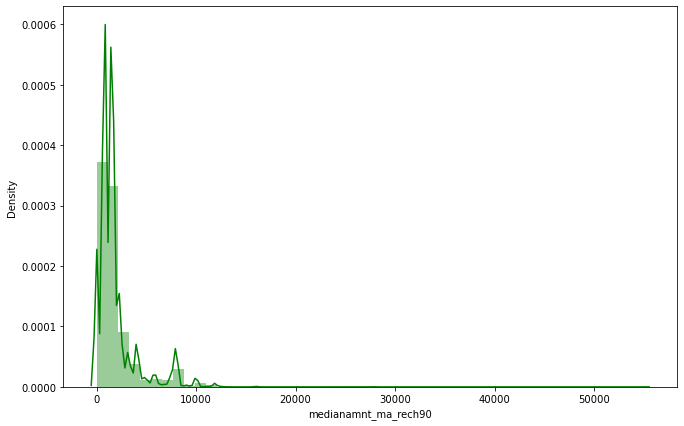

medianmarechprebal90
44.88018204130558


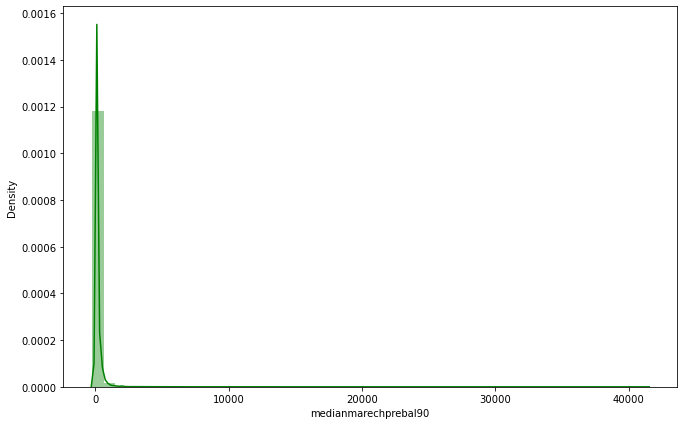

cnt_da_rech30
17.818236613825185


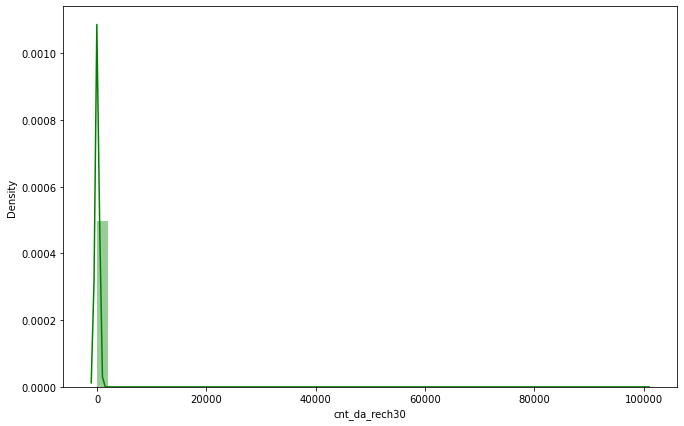

fr_da_rech30
14.776324483257788


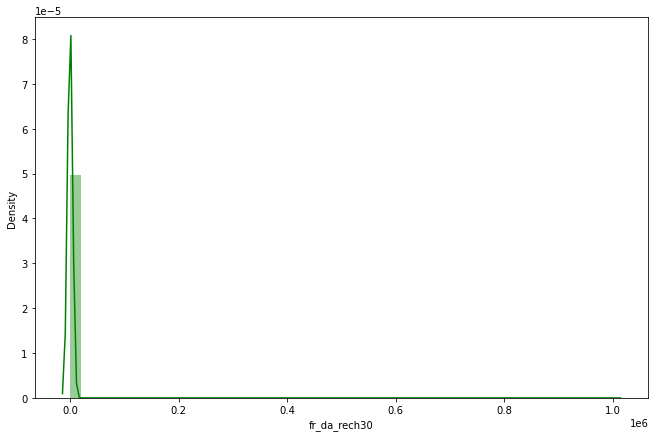

cnt_da_rech90
27.26708253699577


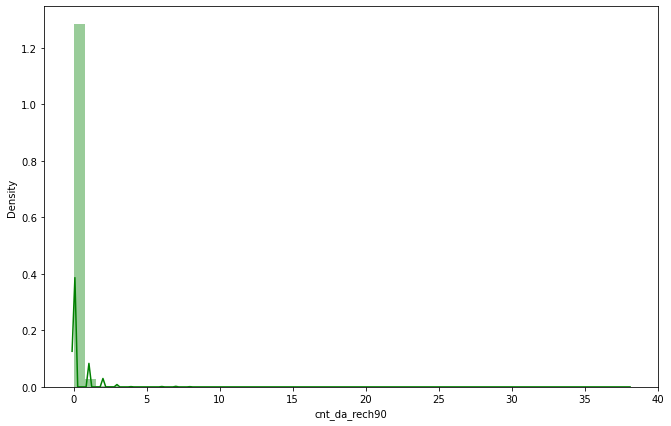

fr_da_rech90
28.987875246755486


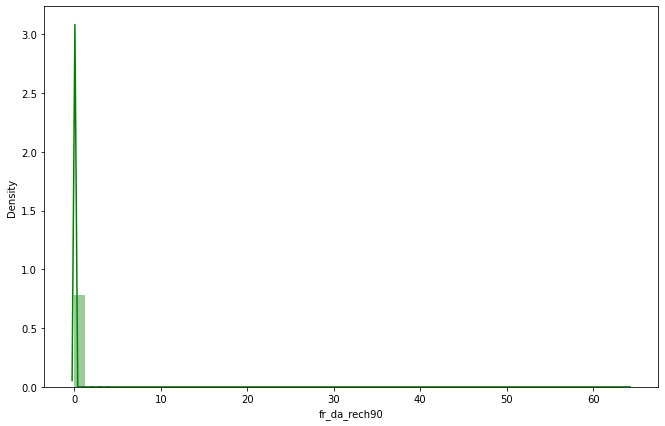

cnt_loans30
2.7134016676460946


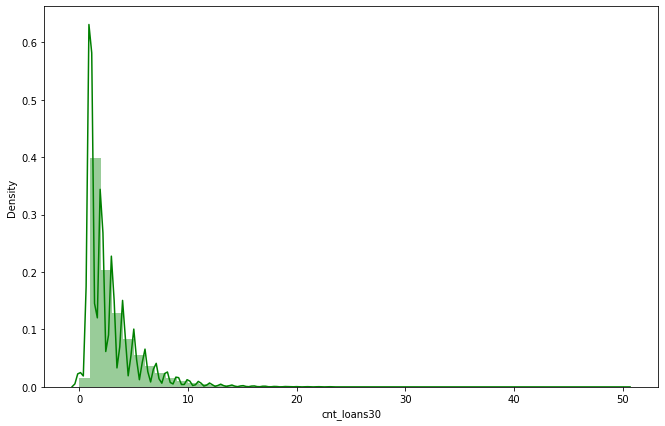

amnt_loans30
2.9756981766272026


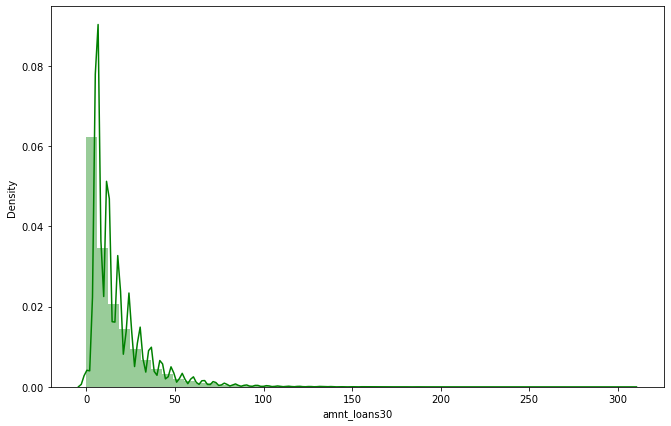

maxamnt_loans30
17.657925277921116


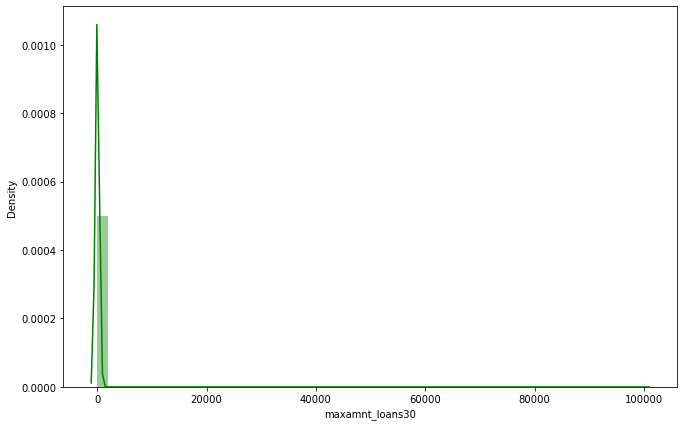

medianamnt_loans30
4.55101044632022


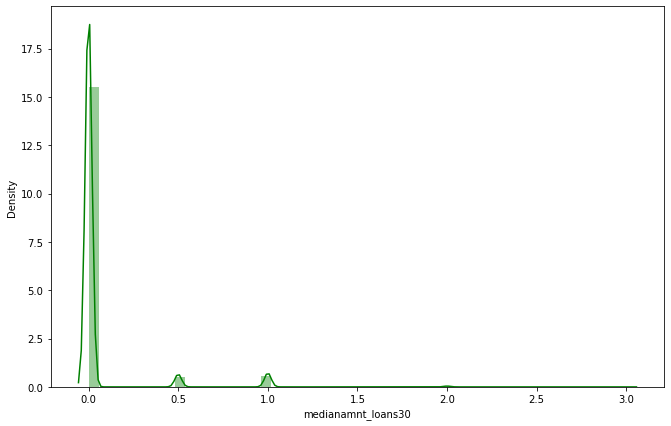

cnt_loans90
16.594289211972985


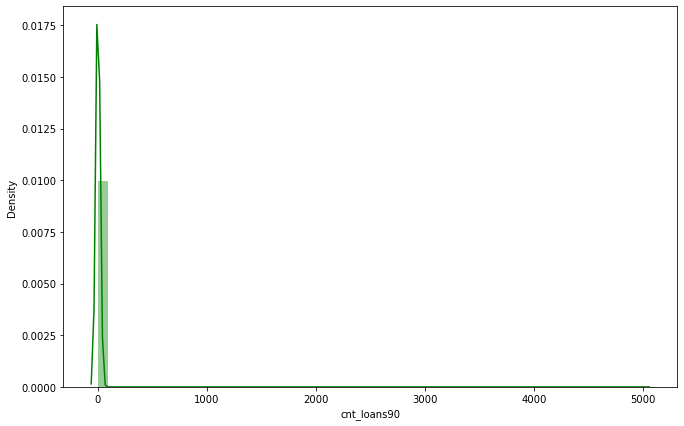

amnt_loans90
3.1499837881606


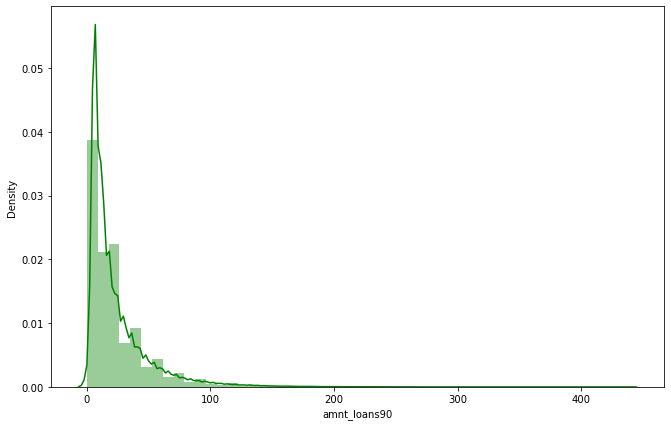

maxamnt_loans90
1.6782917785500069


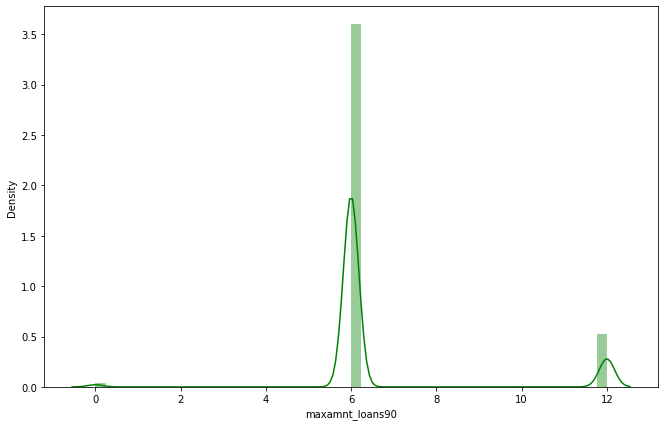

medianamnt_loans90
4.8956852390988965


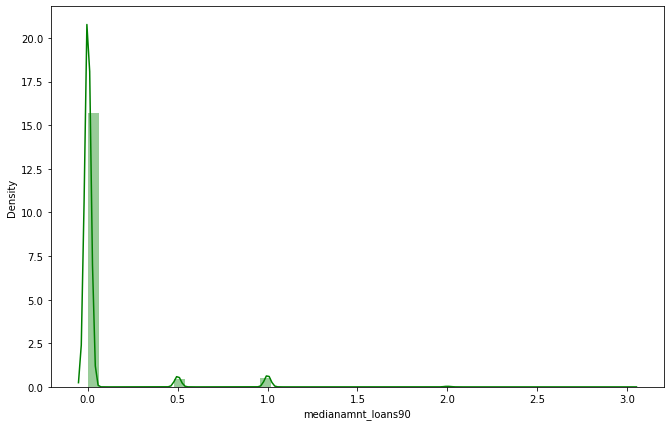

payback30
8.31063517895075


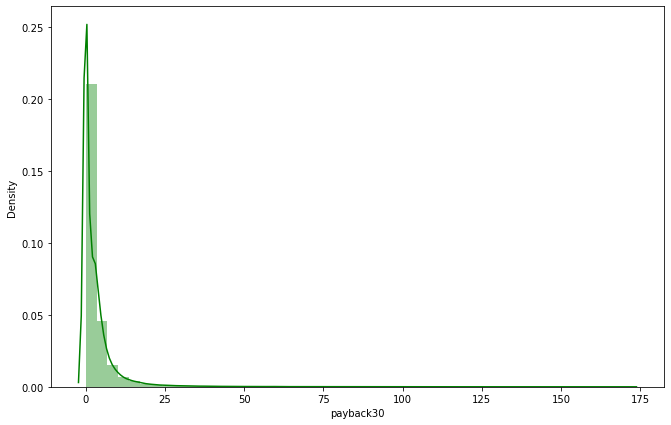

payback90
6.899901431460752


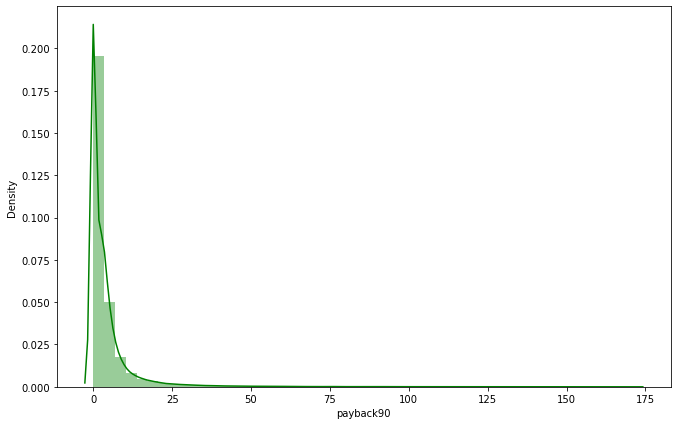

In [19]:
for i in data:
    print(i)
    print(skew(data[i]))
    
    plt.figure(figsize=[11,7])
    sns.distplot(data[i],color='g')
    plt.show()

### Observation-4

In our data set all the columns have outliers as we can see, In all the columns the diffrence between mean and standard deviation is very high and the gap between standard deviavtion and the max values is also very high, It shows that the outliers are present in most of the colunms.

In the above dataset most of the columns has skewness :

High skewness represents data imbalancy.

Less skewness represents that our data are equally distributed.

If we see the skewness in our data set then we will find that our most of the colunm's data are skewed.This is because of mean is greater than median in most of the colunms.

## Checking correlation

In [20]:
data.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

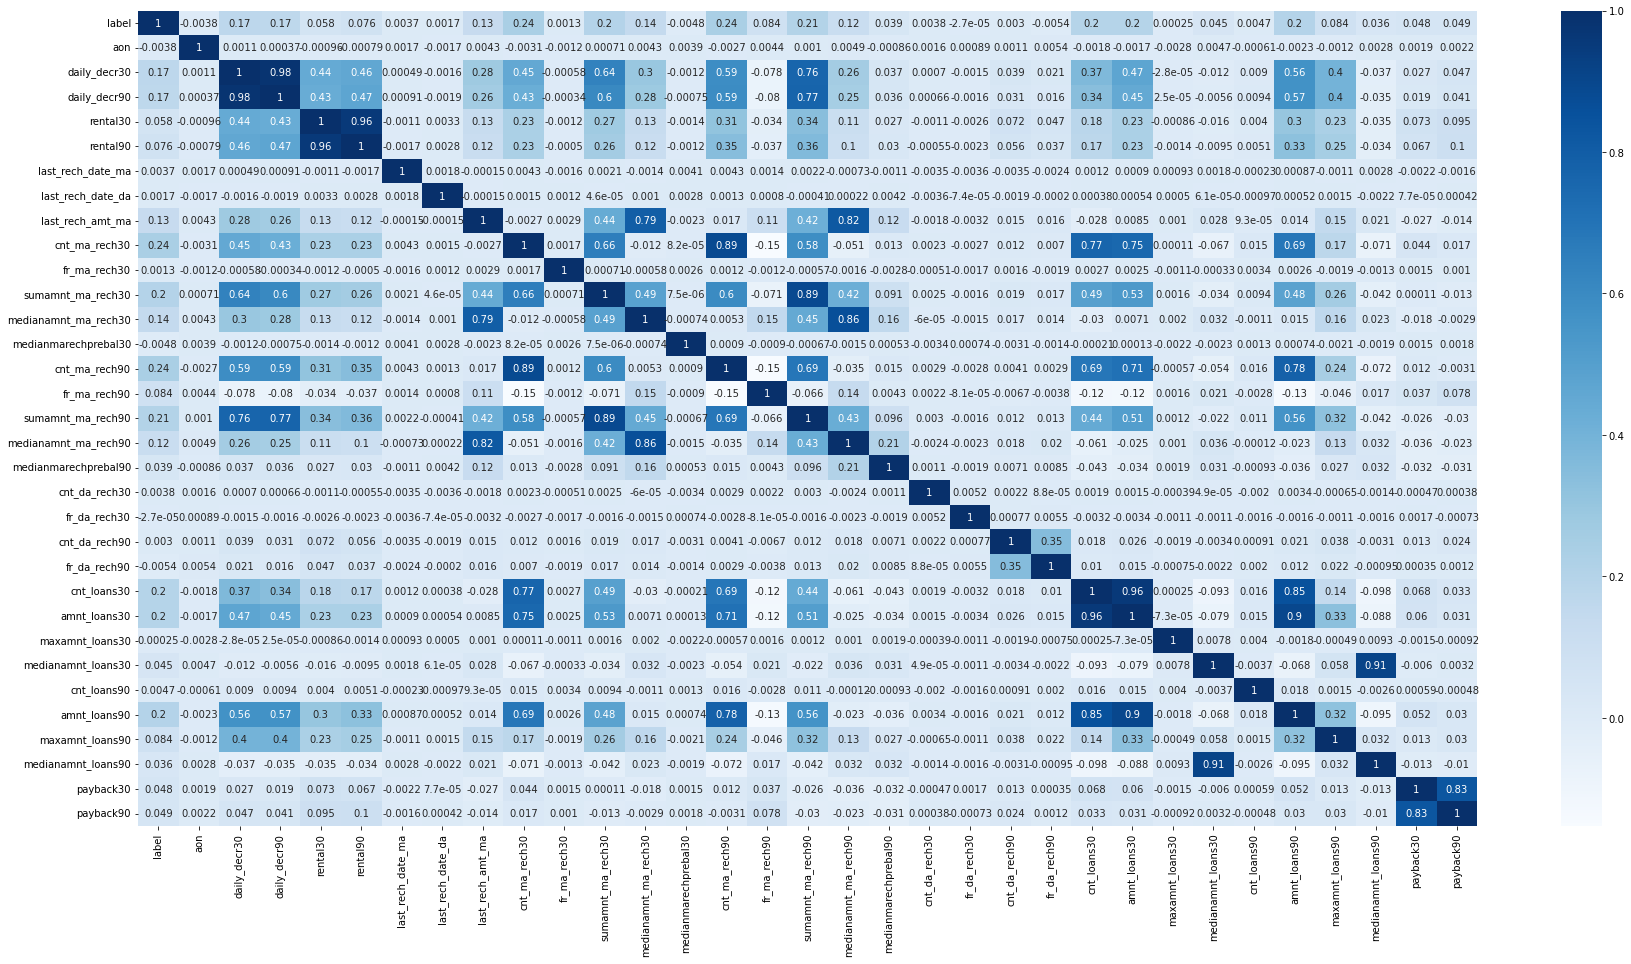

In [21]:
plt.figure(figsize=[30,15])
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

<AxesSubplot:>

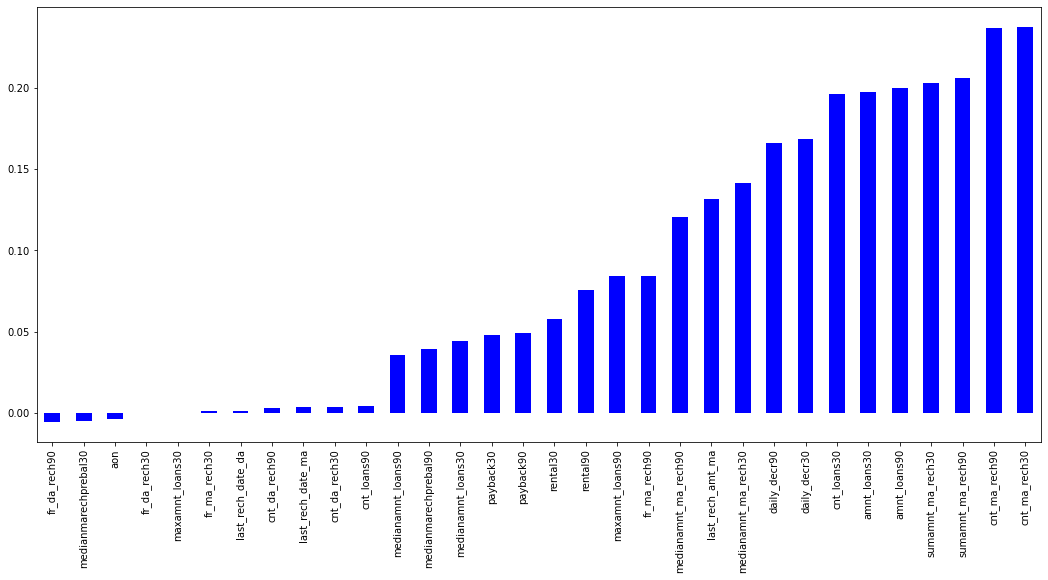

In [22]:
plt.figure(figsize=[18,8])
data.corr()['label'].sort_values().drop(['label']).plot(kind='bar',color='b')

### Observation-6

## Data preprocessing

In [23]:
y=data['label']

In [24]:
data.drop(["label"],axis=1,inplace=True)

In [25]:
x=data

In [26]:
x.shape

(209593, 32)

In [27]:
y.shape

(209593,)

In [28]:
col=x.columns

### Removing Outliers

In [29]:
from scipy.stats import zscore
import numpy as np

In [30]:
z=np.abs(zscore(x))
z.shape

(209593, 32)

In [31]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([14, 14, 31, ..., 27, 25, 29], dtype=int64))


In [32]:
x=x[(z<3).all(axis=1)]

In [33]:
y=y[(z<3).all(axis=1)]

### Removing Skewness

In [34]:
from sklearn.preprocessing import power_transform

In [35]:
x=power_transform(x,method='yeo-johnson')

In [36]:
x=pd.DataFrame(x,columns=col)

In [37]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0 -0.712622      0.582341      0.555278 -0.624959 -0.616801   
1  0.262548      1.309808      1.256117  0.692816  0.435957   
2 -0.095817      0.238926      0.220474 -0.321761 -0.384846   
3 -0.796135     -0.987512     -0.983150 -0.656267 -0.659115   
4  0.696397     -0.523414     -0.524744 -0.241185 -0.319227   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0          -0.364894          -0.099173          0.181994      -0.246020   
1           1.434865          -0.099173          1.760365      -0.777125   
2          -0.242702          -0.099173          0.181994      -0.777125   
3           3.156936          -0.099173         -0.222019      -1.621340   
4          -0.126038          -0.099173          0.582817       1.163518   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      1.704707          -0.090540              0.306577   
1     -1.105101           0.356149              1.882049   
2     -1.105101          -0.483363              0.306577   
3     -1.105101          -1.856800             -1.911960   
4      0.170321           1.565364              0.706578   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0             -0.438401      -0.538011      1.388159          -0.362354   
1              0.007869      -0.984874     -1.172626           0.032707   
2              0.046191      -0.984874     -1.172626          -0.711413   
3             -0.529114      -0.984874     -1.172626          -0.912656   
4             -0.240843       0.797280     -0.020900           1.265543   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0              0.249920             -0.509975      -0.101329           0.0   
1              1.968887              0.010172      -0.101329           0.0   
2              0.249920              0.056103      -0.101329           0.0   
3             -0.183131             -0.572139      -0.101329           0.0   
4              0.953545             -0.226310      -0.101329           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0      -0.141331           0.0     0.068819     -0.038808        -0.181166   
1      -0.141331           0.0    -0.986556     -0.038808         2.085464   
2      -0.141331           0.0    -0.986556     -0.985006        -0.181166   
3      -0.141331           0.0     0.068819     -0.038808        -0.181166   
4      -0.141331           0.0     1.712419      1.693212        -0.181166   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0           -0.180636    -0.125586     -0.140958     0.000000e+00   
1           -0.180636    -1.118376     -0.140958     6.938894e-18   
2           -0.180636    -1.118376     -1.167288     0.000000e+00   
3           -0.180636    -0.125586     -0.140958     0.000000e+00   
4           -0.180636     1.361243      1.288074     0.000000e+00   

   medianamnt_loans90  payback30  payback90  
0           -0.159769   1.845765   1.882985  
1           -0.159769  -0.912913  -0.987912  
2           -0.159769  -0.912913  -0.987912  
3           -0.159769  -0.912913  -0.987912  
4           -0.159769   0.681660   0.480879

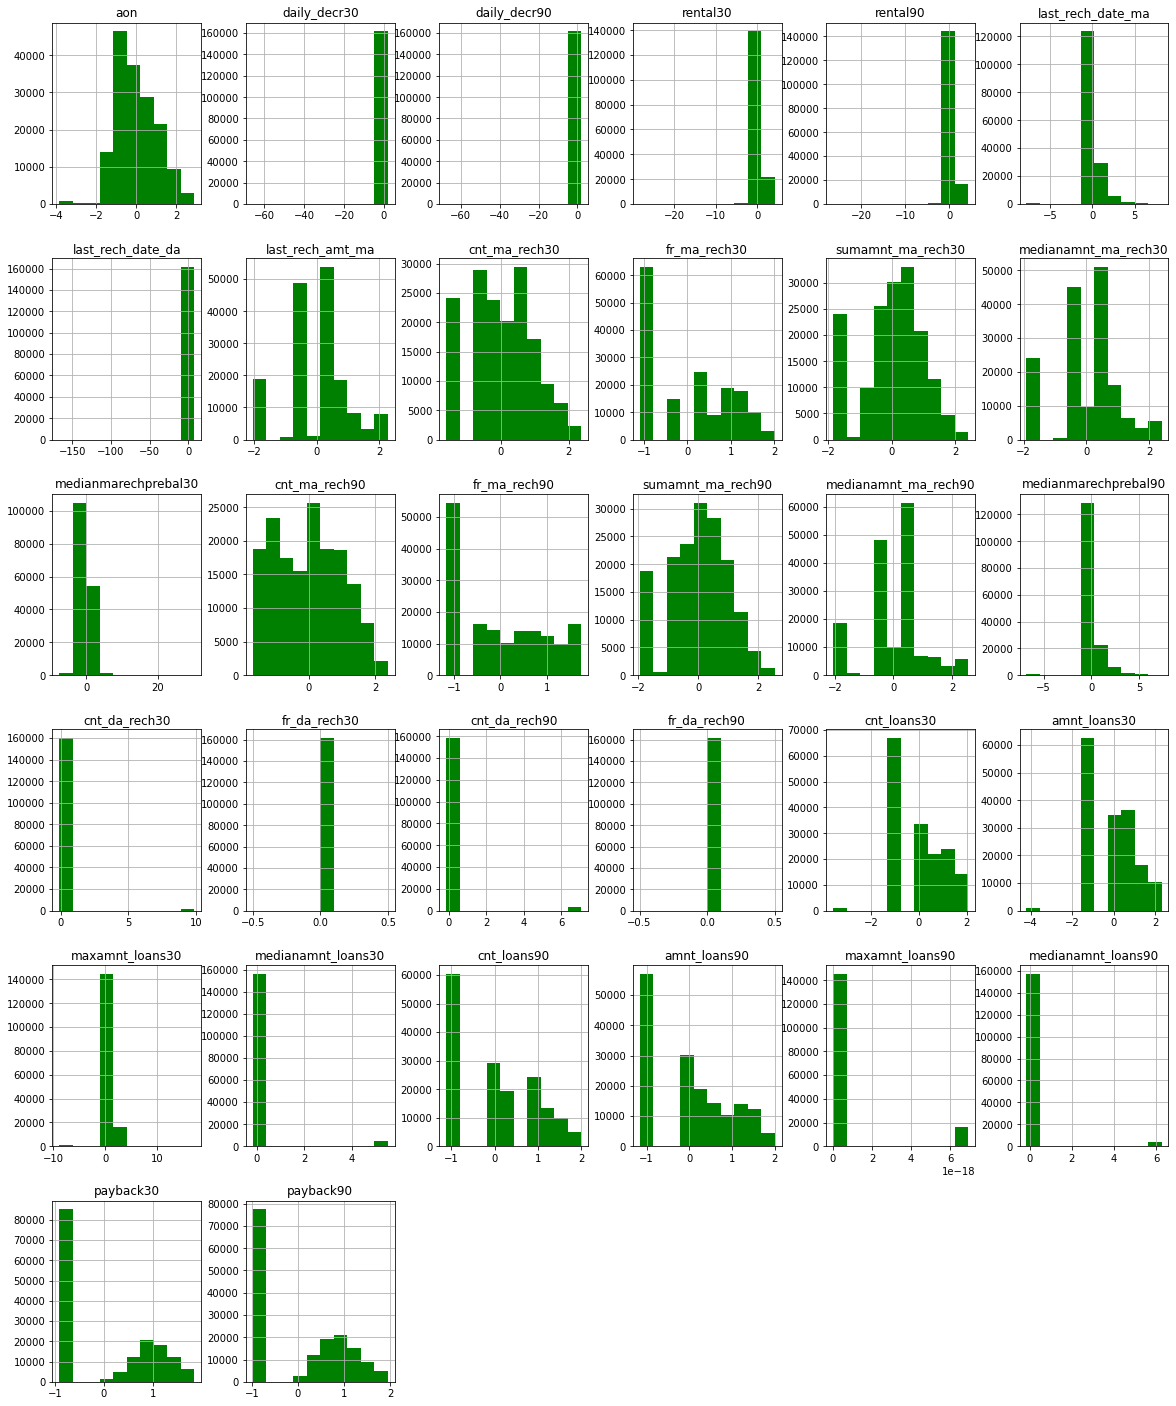

In [38]:
x.hist(figsize=[20,25],color='g')
plt.show()

## Data Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()

In [41]:
x=ss.fit_transform(x)

In [42]:
x=pd.DataFrame(x,columns=col)

In [43]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0 -0.712622      0.582341      0.555278 -0.624959 -0.616801   
1  0.262548      1.309808      1.256117  0.692816  0.435957   
2 -0.095817      0.238926      0.220474 -0.321761 -0.384846   
3 -0.796135     -0.987512     -0.983150 -0.656267 -0.659115   
4  0.696397     -0.523414     -0.524744 -0.241185 -0.319227   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0          -0.364894          -0.099173          0.181994      -0.246020   
1           1.434865          -0.099173          1.760365      -0.777125   
2          -0.242702          -0.099173          0.181994      -0.777125   
3           3.156936          -0.099173         -0.222019      -1.621340   
4          -0.126038          -0.099173          0.582817       1.163518   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      1.704707          -0.090540              0.306577   
1     -1.105101           0.356149              1.882049   
2     -1.105101          -0.483363              0.306577   
3     -1.105101          -1.856800             -1.911960   
4      0.170321           1.565364              0.706578   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0             -0.438401      -0.538011      1.388159          -0.362354   
1              0.007869      -0.984874     -1.172626           0.032707   
2              0.046191      -0.984874     -1.172626          -0.711413   
3             -0.529114      -0.984874     -1.172626          -0.912656   
4             -0.240843       0.797280     -0.020900           1.265543   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0              0.249920             -0.509975      -0.101329           0.0   
1              1.968887              0.010172      -0.101329           0.0   
2              0.249920              0.056103      -0.101329           0.0   
3             -0.183131             -0.572139      -0.101329           0.0   
4              0.953545             -0.226310      -0.101329           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0      -0.141331           0.0     0.068819     -0.038808        -0.181166   
1      -0.141331           0.0    -0.986556     -0.038808         2.085464   
2      -0.141331           0.0    -0.986556     -0.985006        -0.181166   
3      -0.141331           0.0     0.068819     -0.038808        -0.181166   
4      -0.141331           0.0     1.712419      1.693212        -0.181166   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0           -0.180636    -0.125586     -0.140958        -0.331915   
1           -0.180636    -1.118376     -0.140958         3.012819   
2           -0.180636    -1.118376     -1.167288        -0.331915   
3           -0.180636    -0.125586     -0.140958        -0.331915   
4           -0.180636     1.361243      1.288074        -0.331915   

   medianamnt_loans90  payback30  payback90  
0           -0.159769   1.845765   1.882985  
1           -0.159769  -0.912913  -0.987912  
2           -0.159769  -0.912913  -0.987912  
3           -0.159769  -0.912913  -0.987912  
4           -0.159769   0.681660   0.480879

## VIF
## Variance inflation factor

In [44]:
import statsmodels.api as si
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
def vif(i):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [46]:
vif(x)

variables  vif factor
0                    aon    1.028565
1           daily_decr30  367.383642
2           daily_decr90  380.320948
3               rental30   14.342734
4               rental90   15.543463
5      last_rech_date_ma    1.684552
6      last_rech_date_da    1.753698
7       last_rech_amt_ma    6.631485
8          cnt_ma_rech30   49.627643
9           fr_ma_rech30    2.322539
10     sumamnt_ma_rech30   79.570347
11  medianamnt_ma_rech30   18.179551
12  medianmarechprebal30    2.966312
13         cnt_ma_rech90   53.098148
14          fr_ma_rech90    2.078003
15     sumamnt_ma_rech90   71.672808
16  medianamnt_ma_rech90   17.604272
17  medianmarechprebal90    2.968640
18         cnt_da_rech30    2.020826
19          fr_da_rech30         NaN
20         cnt_da_rech90    3.047329
21          fr_da_rech90         NaN
22           cnt_loans30  183.338759
23          amnt_loans30  185.646260
24       maxamnt_loans30    3.387930
25    medianamnt_loans30    2.984419
26           cnt_loans90  168.931452
27          amnt_loans90  173.039954
28       maxamnt_loans90    4.977233
29    medianamnt_loans90    2.995211
30             payback30    6.602483
31             payback90    6.493160

In [47]:
x.drop(['fr_da_rech90'],axis=1,inplace=True)
x.drop(['fr_da_rech30'],axis=1,inplace=True)
x.drop(['daily_decr90'],axis=1,inplace=True)

In [48]:
vif(x)

variables  vif factor
0                    aon    1.028563
1           daily_decr30    2.313682
2               rental30   13.278248
3               rental90   14.346058
4      last_rech_date_ma    1.682256
5      last_rech_date_da    1.753596
6       last_rech_amt_ma    6.626923
7          cnt_ma_rech30   49.622104
8           fr_ma_rech30    2.322230
9      sumamnt_ma_rech30   78.367461
10  medianamnt_ma_rech30   18.051241
11  medianmarechprebal30    2.965999
12         cnt_ma_rech90   53.093583
13          fr_ma_rech90    2.077353
14     sumamnt_ma_rech90   70.670869
15  medianamnt_ma_rech90   17.566866
16  medianmarechprebal90    2.967816
17         cnt_da_rech30    2.020825
18         cnt_da_rech90    3.047328
19           cnt_loans30  183.051189
20          amnt_loans30  185.646224
21       maxamnt_loans30    3.387398
22    medianamnt_loans30    2.984336
23           cnt_loans90  168.883238
24          amnt_loans90  172.952507
25       maxamnt_loans90    4.977116
26    medianamnt_loans90    2.995204
27             payback30    6.599486
28             payback90    6.491691

In [49]:
x.drop(['amnt_loans30'],axis=1,inplace=True)

In [50]:
vif(x)

variables  vif factor
0                    aon    1.028549
1           daily_decr30    2.313642
2               rental30   13.273345
3               rental90   14.334261
4      last_rech_date_ma    1.682256
5      last_rech_date_da    1.753589
6       last_rech_amt_ma    6.624485
7          cnt_ma_rech30   49.619887
8           fr_ma_rech30    2.310516
9      sumamnt_ma_rech30   78.344129
10  medianamnt_ma_rech30   18.019008
11  medianmarechprebal30    2.965980
12         cnt_ma_rech90   53.093177
13          fr_ma_rech90    2.070895
14     sumamnt_ma_rech90   70.654815
15  medianamnt_ma_rech90   17.566794
16  medianmarechprebal90    2.965973
17         cnt_da_rech30    2.020824
18         cnt_da_rech90    3.047325
19           cnt_loans30   11.613100
20       maxamnt_loans30    2.586271
21    medianamnt_loans30    2.984161
22           cnt_loans90   97.631711
23          amnt_loans90   97.553622
24       maxamnt_loans90    4.450178
25    medianamnt_loans90    2.984201
26             payback30    6.558834
27             payback90    6.477702

In [51]:
x.drop(['cnt_loans90'],axis=1,inplace=True)

In [52]:
vif(x)

variables  vif factor
0                    aon    1.028404
1           daily_decr30    2.309499
2               rental30   13.267270
3               rental90   14.317369
4      last_rech_date_ma    1.682134
5      last_rech_date_da    1.753540
6       last_rech_amt_ma    6.623780
7          cnt_ma_rech30   49.338503
8           fr_ma_rech30    2.310502
9      sumamnt_ma_rech30   78.338752
10  medianamnt_ma_rech30   18.016411
11  medianmarechprebal30    2.965969
12         cnt_ma_rech90   52.882510
13          fr_ma_rech90    2.065825
14     sumamnt_ma_rech90   70.631463
15  medianamnt_ma_rech90   17.544929
16  medianmarechprebal90    2.963135
17         cnt_da_rech30    2.020762
18         cnt_da_rech90    3.046941
19           cnt_loans30   10.947920
20       maxamnt_loans30    2.543203
21    medianamnt_loans30    2.981303
22          amnt_loans90   13.785862
23       maxamnt_loans90    3.045548
24    medianamnt_loans90    2.976309
25             payback30    6.553158
26             payback90    6.378156

In [53]:
x.drop(['sumamnt_ma_rech30'],axis=1,inplace=True)

In [54]:
vif(x)

variables  vif factor
0                    aon    1.028384
1           daily_decr30    2.309487
2               rental30   13.218766
3               rental90   14.267745
4      last_rech_date_ma    1.682128
5      last_rech_date_da    1.753495
6       last_rech_amt_ma    6.490899
7          cnt_ma_rech30   11.022089
8           fr_ma_rech30    2.271382
9   medianamnt_ma_rech30    6.045375
10  medianmarechprebal30    2.965883
11         cnt_ma_rech90   23.713377
12          fr_ma_rech90    2.035226
13     sumamnt_ma_rech90   22.516657
14  medianamnt_ma_rech90   11.319728
15  medianmarechprebal90    2.963115
16         cnt_da_rech30    2.020703
17         cnt_da_rech90    3.046905
18           cnt_loans30   10.941539
19       maxamnt_loans30    2.543116
20    medianamnt_loans30    2.981154
21          amnt_loans90   13.785826
22       maxamnt_loans90    3.045349
23    medianamnt_loans90    2.976309
24             payback30    6.547071
25             payback90    6.368134

In [55]:
x.drop(['cnt_ma_rech90'],axis=1,inplace=True)

In [56]:
vif(x)

variables  vif factor
0                    aon    1.026950
1           daily_decr30    2.301759
2               rental30   12.981604
3               rental90   13.989920
4      last_rech_date_ma    1.599151
5      last_rech_date_da    1.753397
6       last_rech_amt_ma    6.484999
7          cnt_ma_rech30    5.668496
8           fr_ma_rech30    2.269016
9   medianamnt_ma_rech30    5.911426
10  medianmarechprebal30    2.960902
11          fr_ma_rech90    2.017652
12     sumamnt_ma_rech90   11.468160
13  medianamnt_ma_rech90    9.862809
14  medianmarechprebal90    2.958444
15         cnt_da_rech30    2.020559
16         cnt_da_rech90    3.046766
17           cnt_loans30   10.342349
18       maxamnt_loans30    2.523999
19    medianamnt_loans30    2.980846
20          amnt_loans90   12.810849
21       maxamnt_loans90    2.946475
22    medianamnt_loans90    2.975948
23             payback30    6.545536
24             payback90    6.366651

In [57]:
x.drop(['rental90'],axis=1,inplace=True)

In [58]:
vif(x)

variables  vif factor
0                    aon    1.026916
1           daily_decr30    2.285503
2               rental30    1.269050
3      last_rech_date_ma    1.598958
4      last_rech_date_da    1.753382
5       last_rech_amt_ma    6.480230
6          cnt_ma_rech30    5.602538
7           fr_ma_rech30    2.268985
8   medianamnt_ma_rech30    5.910587
9   medianmarechprebal30    2.960735
10          fr_ma_rech90    2.017531
11     sumamnt_ma_rech90   11.254711
12  medianamnt_ma_rech90    9.827881
13  medianmarechprebal90    2.958058
14         cnt_da_rech30    2.019916
15         cnt_da_rech90    3.046614
16           cnt_loans30   10.124873
17       maxamnt_loans30    2.521321
18    medianamnt_loans30    2.980742
19          amnt_loans90   12.590388
20       maxamnt_loans90    2.945528
21    medianamnt_loans90    2.975801
22             payback30    6.545322
23             payback90    6.364658

In [59]:
x.drop(['amnt_loans90'],axis=1,inplace=True)

In [60]:
vif(x)

variables  vif factor
0                    aon    1.023994
1           daily_decr30    2.171948
2               rental30    1.268422
3      last_rech_date_ma    1.596398
4      last_rech_date_da    1.753335
5       last_rech_amt_ma    6.468649
6          cnt_ma_rech30    5.396950
7           fr_ma_rech30    2.267749
8   medianamnt_ma_rech30    5.896630
9   medianmarechprebal30    2.958740
10          fr_ma_rech90    2.015944
11     sumamnt_ma_rech90   10.181244
12  medianamnt_ma_rech90    9.561479
13  medianmarechprebal90    2.956181
14         cnt_da_rech30    2.019871
15         cnt_da_rech90    3.046590
16           cnt_loans30    3.658661
17       maxamnt_loans30    2.201026
18    medianamnt_loans30    2.978814
19       maxamnt_loans90    2.285261
20    medianamnt_loans90    2.974985
21             payback30    6.357419
22             payback90    5.307274

In [61]:
x.drop(['sumamnt_ma_rech90'],axis=1,inplace=True)

In [62]:
vif(x)

variables  vif factor
0                    aon    1.023753
1           daily_decr30    1.838868
2               rental30    1.263442
3      last_rech_date_ma    1.594799
4      last_rech_date_da    1.753298
5       last_rech_amt_ma    6.296358
6          cnt_ma_rech30    2.852918
7           fr_ma_rech30    2.262367
8   medianamnt_ma_rech30    5.859502
9   medianmarechprebal30    2.956054
10          fr_ma_rech90    2.007832
11  medianamnt_ma_rech90    8.078647
12  medianmarechprebal90    2.956120
13         cnt_da_rech30    2.019508
14         cnt_da_rech90    3.046263
15           cnt_loans30    3.624773
16       maxamnt_loans30    2.189770
17    medianamnt_loans30    2.976780
18       maxamnt_loans90    2.235024
19    medianamnt_loans90    2.971081
20             payback30    6.285178
21             payback90    5.270587

In [63]:
x.drop(['medianamnt_ma_rech90'],axis=1,inplace=True)

In [64]:
vif(x)

variables  vif factor
0                    aon    1.023596
1           daily_decr30    1.837112
2               rental30    1.263251
3      last_rech_date_ma    1.478725
4      last_rech_date_da    1.753297
5       last_rech_amt_ma    4.266266
6          cnt_ma_rech30    2.832416
7           fr_ma_rech30    2.261883
8   medianamnt_ma_rech30    4.237646
9   medianmarechprebal30    2.935727
10          fr_ma_rech90    1.999459
11  medianmarechprebal90    2.916633
12         cnt_da_rech30    2.019384
13         cnt_da_rech90    3.046167
14           cnt_loans30    3.621274
15       maxamnt_loans30    2.189464
16    medianamnt_loans30    2.976604
17       maxamnt_loans90    2.234892
18    medianamnt_loans90    2.970925
19             payback30    6.284388
20             payback90    5.260932

### Data Balancing by SMOTE technique

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
sm=SMOTE()

<AxesSubplot:xlabel='label', ylabel='count'>

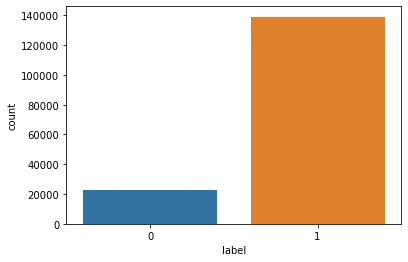

In [67]:
sns.countplot(y)

In [68]:
x,y=sm.fit_resample(x,y)

<AxesSubplot:xlabel='label', ylabel='count'>

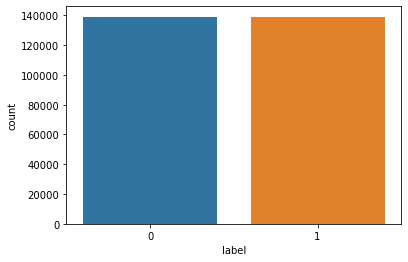

In [69]:
sns.countplot(y)

### Model learning phase
So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target. Here we are going to use classification model because our target column is catagorical in nature.

For classification model, Some matrix we are going to find like:

* Confusion matrix
* Accuracu Score
* Classification report

### Models:
Decision Tree classifier

KNeighbors classifier

Support vectod machine classifier

Naive bayes classifier

For bagging and boosting :

Random Forest classifier

AdaBoost classifier

Gradient Boosting classifier

XGboost classifier

In [70]:
x.shape

(278130, 21)

In [71]:
y.shape

(278130,)

In [72]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [73]:
def model_select(model):
    max_score=0
    max_state=0
    
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
        md=model()
        md.fit(x_train,y_train)
        pred=md.predict(x_test)
        ac_score=accuracy_score(y_test,pred)
        
        if ac_score>max_score:
            max_score=ac_score
            max_state=i
            
    print("Max accuracy is {} at random state {}".format(max_score,max_state))  

## Logistic Regression
Finding best random state by calling model_select function

In [74]:
model_select(LogisticRegression)

Max accuracy is 0.7729167007141806 at random state 89


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=89)

In [76]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.7729167007141806
[[23777  7004]
 [ 6891 23517]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     30781
           1       0.77      0.77      0.77     30408

    accuracy                           0.77     61189
   macro avg       0.77      0.77      0.77     61189
weighted avg       0.77      0.77      0.77     61189



In [78]:
for i in range(9,12):
    cvs=cross_val_score(lr,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 9 --- 0.7686801238391197
cross validation when cv = 10 --- 0.768593823032395
cross validation when cv = 11 --- 0.7686297836738955


In [98]:
cvlr=11
Modellr=77.29
Cslr= 76.86
Diffrencelr= 77.29-76.86

### Decision tree classifier
Finding best random state by calling model_select function

In [80]:
model_select(DecisionTreeClassifier)

Max accuracy is 0.8902253673045809 at random state 46


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=46)

In [82]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8883296017258004
[[27487  3089]
 [ 3744 26869]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     30576
           1       0.90      0.88      0.89     30613

    accuracy                           0.89     61189
   macro avg       0.89      0.89      0.89     61189
weighted avg       0.89      0.89      0.89     61189



In [83]:
for i in range(9,12):
    cvs=cross_val_score(dtc,x,y,cv=i)
    print("cross validation when cv =",i,'---',cvs.mean())

cross validation when cv = 9 --- 0.889393826460354
cross validation when cv = 10 --- 0.8898033293783483
cross validation when cv = 11 --- 0.8901595726822691


In [99]:
cvdtc=11
Modeldtc=88.83
Csdtc= 88.00
Diffrencedtc= 88.83-88

## Ensamble technique --
Bagging and boosting

### Random forest classifier
Finding best random state by calling model_select function

In [85]:
model_select(RandomForestClassifier)

Max accuracy is 0.9391393877984605 at random state 46


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=46)

In [87]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9386164179836245
[[28910  1718]
 [ 2038 28523]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     30628
           1       0.94      0.93      0.94     30561

    accuracy                           0.94     61189
   macro avg       0.94      0.94      0.94     61189
weighted avg       0.94      0.94      0.94     61189



In [88]:
cvr=cross_val_score(rfc,x,y,cv=12)
print("Cross validation when cv=",12,"---",cvr.mean())

Cross validation when cv= 12 --- 0.9401110961122545


In [112]:
cvrfc=12
Modelrfc= 93.86
Csrfc=93
Diffrencerfc=93.86-93

## AdaBoostClassifier
Finding best random state by calling model_select function

In [89]:
model_select(AdaBoostClassifier)

Max accuracy is 0.8185948454787625 at random state 33


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=33)

In [91]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8185948454787625
[[25567  4838]
 [ 6262 24522]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     30405
           1       0.84      0.80      0.82     30784

    accuracy                           0.82     61189
   macro avg       0.82      0.82      0.82     61189
weighted avg       0.82      0.82      0.82     61189



In [92]:
cvr=cross_val_score(ada,x,y,cv=12)
print("Cross validation when cv=",12,"---",cvr.mean())

Cross validation when cv= 12 --- 0.8109734433939152


In [101]:
cvada=13
Modelada = 81.85
Csada= 81.09
Diffrenceada=81.85-81.09

## GradientBoostingClassifier
Finding best random state by calling model_select function

In [93]:
model_select(GradientBoostingClassifier)

Max accuracy is 0.8679501217539101 at random state 53


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.22, random_state=53)

In [95]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.8679501217539101
[[27222  3458]
 [ 4622 25887]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     30680
           1       0.88      0.85      0.87     30509

    accuracy                           0.87     61189
   macro avg       0.87      0.87      0.87     61189
weighted avg       0.87      0.87      0.87     61189



In [97]:
cvr=cross_val_score(gbc,x,y,cv=12)
print("Cross validation when cv=",12,"---",cvr.mean())

Cross validation when cv= 12 --- 0.8618563049005882


In [102]:
cvgbc=12
Modelgbc= 86.79
Csgbc= 86.18
Diffrencegbc =86.79-86.18

## Comparison of all the models

In [113]:
kk={'CV':[cvlr,cvdtc,cvrfc,cvada,cvgbc],
                 'Model_accuracy':[Modellr,Modeldtc,Modelrfc,Modelada,Modelgbc],
                 'Cross validation Score':[Cslr,Csdtc,Csrfc,Csada,Csgbc],
 'Diffrence':[Diffrencelr,Diffrencedtc,Diffrencerfc,Diffrenceada,Diffrencegbc]
 }

In [114]:
result=pd.DataFrame(kk,index=['Logistic','Decision tree','Random forest','Adaboost','GredientBoosting'])

In [115]:
result

CV  Model_accuracy  Cross validation Score  Diffrence
Logistic          11           77.29                   76.86       0.43
Decision tree     11           88.83                   88.00       0.83
Random forest     12           93.86                   93.00       0.86
Adaboost          13           81.85                   81.09       0.76
GredientBoosting  12           86.79                   86.18       0.61

In [116]:
aa=list(result['Model_accuracy'])

In [117]:
bb=list(result.index)

In [118]:
model_all=pd.DataFrame({'Model':bb,'Accuracy':aa})

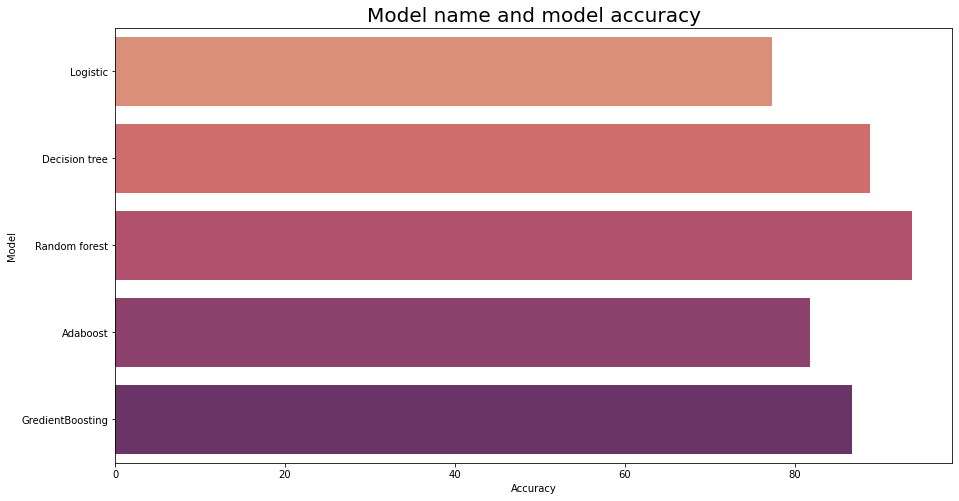

In [119]:
plt.figure(figsize=[15,8])
sns.barplot(data=model_all,y='Model',x='Accuracy',palette='flare')
plt.title("Model name and model accuracy",fontsize=20)
plt.show()

### Best Model
### We are chosing Random forest classifier as a best model, Because this model has least diffrence between model acuracy score and cross validation score and also its accuracy is highest as compare to others.That is why we are choosing RFC
### Model accuracy is : 93.86
### Cross_validation score : 93
### Diffrence : 0.86

## Hyper Parameter tuning
### Grid search cv

In [120]:
parameter={'n_estimators':[20,30,40,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[5,15,30,35],
            'max_features':['sqrt', 'log2']
           }

In [121]:
GSC=GridSearchCV(rfc,parameter,cv=5)
GSC.fit(x_train,y_train)
GSC.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'log2',
 'n_estimators': 50}

In [122]:
GSC.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       n_estimators=50)

In [123]:
GSC_pred=GSC.best_estimator_.predict(x_test)
accuracy_score(y_test,GSC_pred)

0.93724362221968

In [124]:
tune_rfc=RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       n_estimators=50)
tune_rfc.fit(x_train,y_train)
pred=tune_rfc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 0.9367696808249849
[[28947  1733]
 [ 2136 28373]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     30680
           1       0.94      0.93      0.94     30509

    accuracy                           0.94     61189
   macro avg       0.94      0.94      0.94     61189
weighted avg       0.94      0.94      0.94     61189



### We have done with Grid search CV and we got our best model Random forest classifier with 93.67% accuracy.
### Accuracy-93.67%

### AUC-ROC Curve

In [126]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [128]:
y_pred_prob=GSC.best_estimator_.predict_proba(x_test)[:,-1]

In [129]:
y_pred_prob

array([0.96   , 0.7    , 1.     , ..., 0.78   , 0.66   , 0.12625])

In [130]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

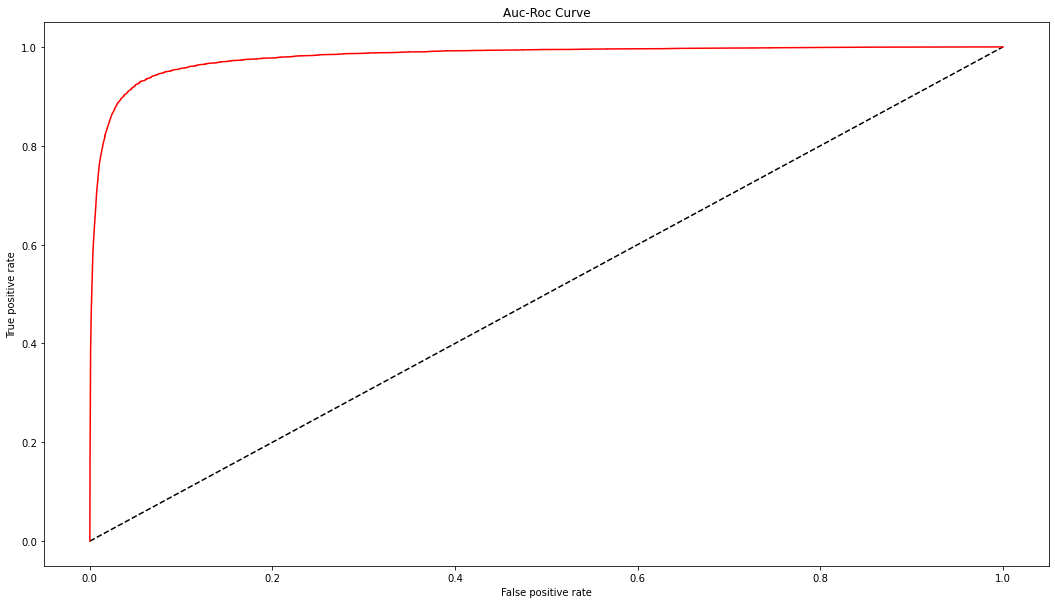

In [134]:
plt.figure(figsize=[18,10])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier",color='r')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Auc-Roc Curve")
plt.show()

In [135]:
Auc_score=roc_auc_score(y_test,GSC.best_estimator_.predict(x_test))

In [137]:
Auc_score

0.937224406455735

### AUC-ROC curve score is 93.72 %

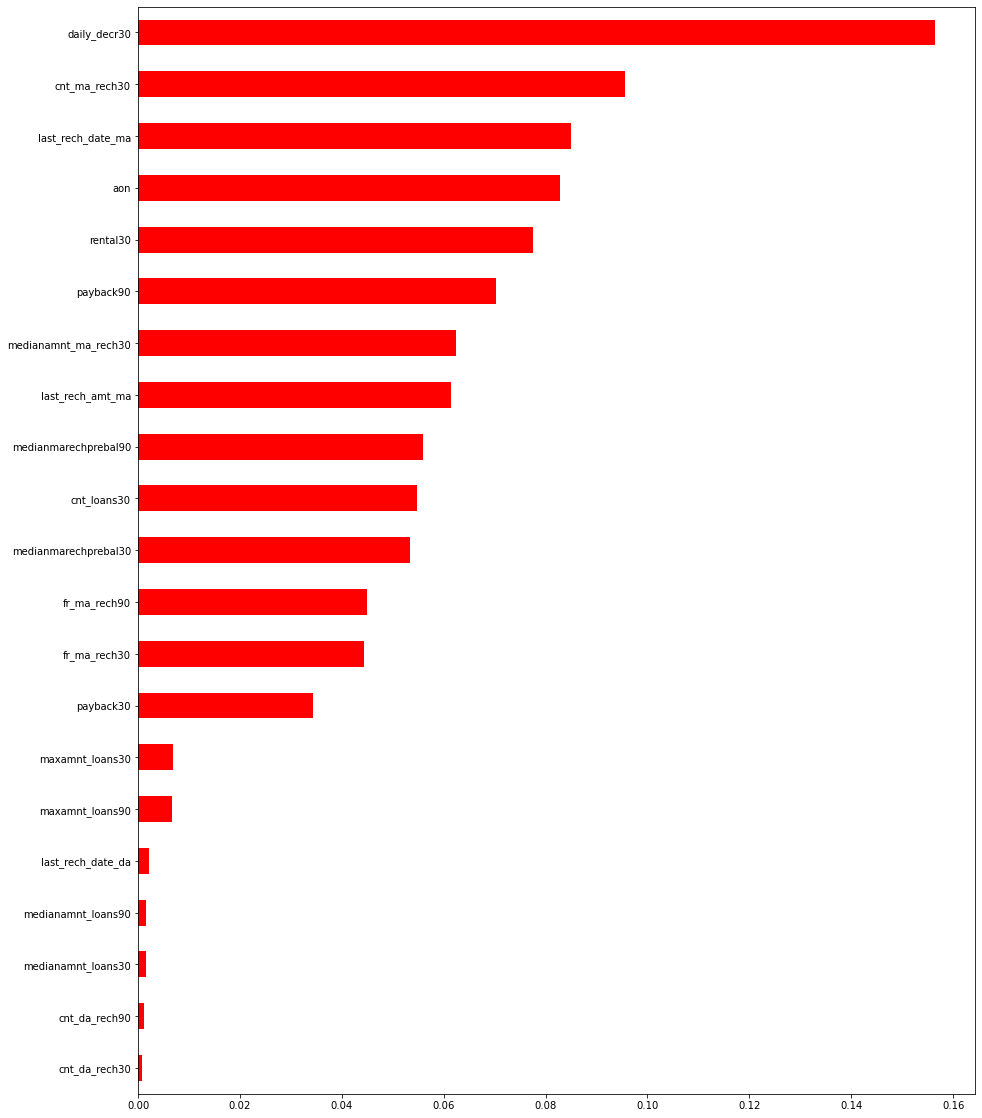

In [139]:
plt.figure(figsize=(15,20))
imp_feature= pd.Series(tune_rfc.feature_importances_,index=x.columns)
imp_feature.nlargest((25)).sort_values().plot(kind='barh',align='center',color='r')
plt.show()


### Prediction

In [140]:
predict=tune_rfc.predict(x_test)[:]

In [141]:
original=y_test[:]

In [142]:
result=pd.DataFrame([predict,original],index=['predict','original'])

In [143]:
result

0      1      2      3      4      5      6      7      8      \
predict       1      1      1      1      1      1      1      1      1   
original      1      1      1      1      1      1      1      1      1   

          9      10     11     12     13     14     15     16     17     \
predict       0      1      1      1      1      0      1      1      1   
original      0      1      1      1      1      0      1      1      1   

          18     19     20     21     22     23     24     25     26     \
predict       1      1      0      1      0      0      0      1      1   
original      1      1      0      1      0      1      0      1      1   

          27     28     29     30     31     32     33     34     35     \
predict       1      0      0      0      1      0      1      0      0   
original      1      0      0      0      1      0      1      0      0   

          36     37     38     39     40     41     42     43     44     \
predict       1      0      1      1      0      1      1      1      0   
original      1      0      1      1      0      1      1      1      0   

          45     46     47     48     49     50     51     52     53     \
predict       1      1      0      0      1      1      0      1      0   
original      1      1      0      0      1      1      0      1      0   

          54     55     56     57     58     59     60     61     62     \
predict       0      0      1      0      1      1      1      1      0   
original      0      0      1      0      1      0      0      1      0   

          63     64     65     66     67     68     69     70     71     \
predict       0      0      1      1      1      0      0      0      1   
original      0      0      1      1      1      0      0      0      1   

          72     73     74     75     76     77     78     79     80     \
predict       0      1      1      1      1      0      0      1      0   
original      0      1      1      1      1      0      0      1      0   

          81     82     83     84     85     86     87     88     89     \
predict       0      0      0      0      0      0      1      1      1   
original      0      0      0      0      0      0      1      1      1   

          90     91     92     93     94     95     96     97     98     \
predict       0      0      0      1      1      1      1      1      1   
original      0      0      0      1      1      1      1      1      1   

          99     100    101    102    103    104    105    106    107    \
predict       0      1      1      1      1      0      0      1      0   
original      0      1      0      1      1      0      0      1      1   

          108    109    110    111    112    113    114    115    116    \
predict       1      1      1      0      1      0      0      1      0   
original      1      1      1      0      1      0      0      1      0   

          117    118    119    120    121    122    123    124    125    \
predict       1      1      1      1      1      1      1      1      0   
original      1      1      1      1      1      1      1      1      0   

          126    127    128    129    130    131    132    133    134    \
predict       1      1      1      0      0      1      1      1      0   
original      1      1      1      0      0      1      1      1      0   

          135    136    137    138    139    140    141    142    143    \
predict       0      0      0      1      1      1      0      1      0   
original      0      0      0      1      0      1      0      1      0   

          144    145    146    147    148    149    150    151    152    \
predict       0      1      0      0      0      0      0      0      1   
original      0      1      0      0      0      0      1      0      1   

          153    154    155    156    157    158    159    160    161    \
predict       1      1      0      0      1      1      1      0      1   
original      1   

### Saving the model

In [144]:
import joblib

In [145]:
joblib.dump(tune_rfc,'Micro-Credit Defaulter')

['Micro-Credit Defaulter']

# Accuracy- 93.67 %